In [2]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [3]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_inliers

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [4]:
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[ 3.01898458,  1.92614894],
       [ 1.57612593,  1.61987267],
       [-1.12407079, -1.65126525],
       [ 2.47488924,  2.48090716],
       [ 2.93657855,  3.30592442],
       [ 0.09073919,  0.01213036],
       [ 2.38636143,  1.19971145],
       [ 1.61573502,  2.36634136],
       [ 3.12004273, -1.29603875],
       [-0.99533638, -3.24814448],
       [ 0.62624113, -3.71246181],
       [-0.27521585,  0.34115708],
       [-1.70766998,  0.72666608],
       [-3.755998  , -3.70121449],
       [ 2.58080449, -1.11847487],
       [-2.9835159 ,  0.17794608],
       [ 2.15994842, -2.27343178],
       [ 0.98312381, -3.31722028],
       [-3.58654623,  0.25083705],
       [ 0.32508097,  1.09943921]])

In [10]:
X = np.r_[X_inliers, X_outliers]
print(X.size)

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

440


In [11]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
X_scores

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ,
       -1.04273309, -0.96537973, -1.12978593, -1.04714221, -1.1241528 ,
       -0.97795087, -0.97358493, -1.13261793, -0.98280096, -1.02069094,
       -0.95891097, -1.1491003 , -1.11886905, -0.99855726, -0.99357848,
       -1.13283666, -1.1460512 , -1.87981613, -0.95747372, -1.2240096 ,
       -0.9432555 , -1.25135605, -1.00309851, -1.10715506, -0.97725017,
       -0.99886729, -0.97739557, -1.09329811, -0.99310409, -0.96318902,
       -1.08969429, -0.97382438, -0.94892287, -1.42556212, -0.96379941,
       -1.27724298, -1.46492263, -0.94595752, -1.04083691, -1.1733885 ,
       -1.06562769, -1.29284358, -1.32423841, -1.06358314, -0.96642636,
       -1.08777278, -1.03217634, -1.24655122, -0.97201908, -1.09

In [12]:
X_scores.size

220

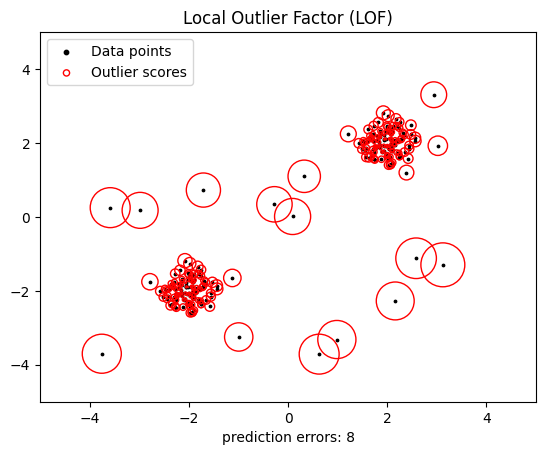

In [13]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()